# Fine Tune GPT-4o-mini

This notebook is a step by step guide to fine tuning GPT-4o-mini. In it we will show:

1. Create a dataset of customer service questions and answers
2. Fine tune GPT-4o-mini on the dataset
3. Evaluate the fine tuned model
4. Compare the fine tuned model to the base model

Then we'll show how to use Direct Preference Optimsation to further improve the fine tuned model.

### Model Training

In [1]:
from src import FineTuner

fine_tune = FineTuner()

In [2]:
training_file_id = fine_tune.upload_file('data/fine_tune.jsonl')
validation_file_id = fine_tune.upload_file('data/fine_tune_val.jsonl')

File uploaded successfully. File ID: file-33aGNVeVEPsXVDF81L5nnB
Total tokens in file: 897
File uploaded successfully. File ID: file-CtxRvvVJtNeKF4EbuqExDQ
Total tokens in file: 485


In [3]:
job_id = fine_tune.create_job(training_file=training_file_id, validation_file=validation_file_id, model='gpt-4o-mini-2024-07-18')

Job created successfully. Job ID: ftjob-pb2RAD13HBbhZIDPlBfxj1xt


In [6]:
import time

fine_tune.get_job_status(job_id)

Status: running
Model: gpt-4o-mini-2024-07-18


UnboundLocalError: cannot access local variable 'start_time' where it is not associated with a value

In [11]:
fine_tune.wait_for_job(job_id)

FineTuningJob(id='ftjob-P7bLZ7iQb8ZrL1yyPBQ4h7xW', created_at=1735314117, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-4o-mini-2024-07-18:capital-on-tap::Aj6uZwIT', finished_at=1735314689, hyperparameters=Hyperparameters(batch_size=1, learning_rate_multiplier=1.8, n_epochs=10), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-gRJta5ZHsm5UqDnzvakpJfML', result_files=['file-2JFRsMBN2AmVFTghHuxuF7'], seed=280178020, status='succeeded', trained_tokens=10160, training_file='file-1eAuGhVuixk5foZkLroCUq', validation_file=None, estimated_finish=None, integrations=[], method=Method(dpo=None, supervised=MethodSupervised(hyperparameters=MethodSupervisedHyperparameters(batch_size=1, learning_rate_multiplier=1.8, n_epochs=10)), type='supervised'), user_provided_suffix=None)

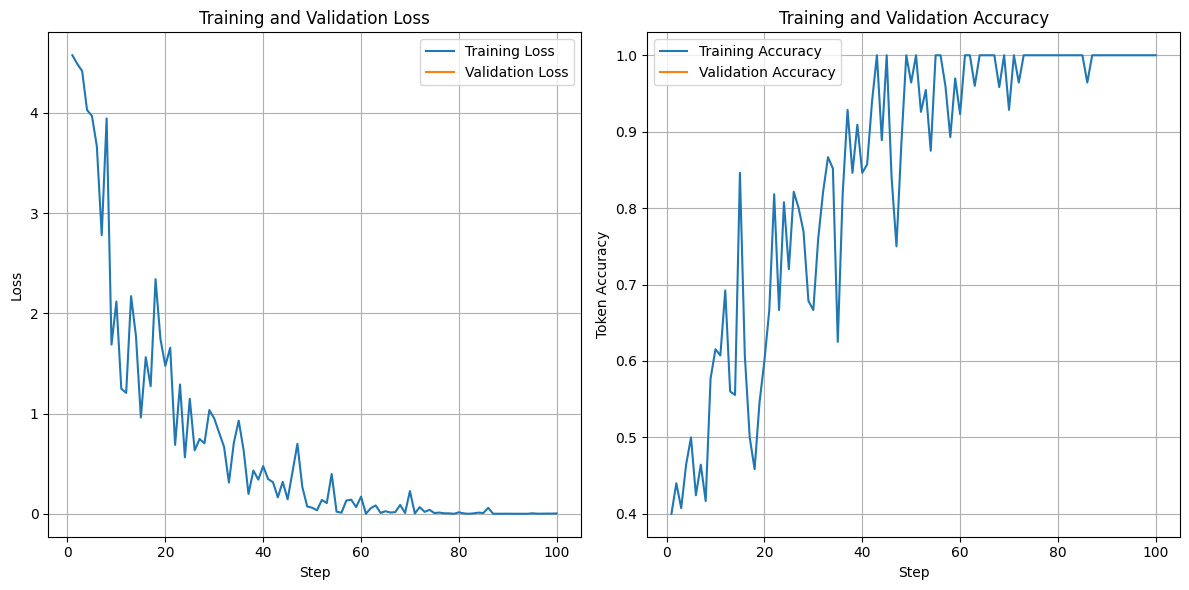

In [12]:
df = fine_tune.get_training_metrics(job_id)

fine_tune.plot_training_metrics(job_id)

In [ ]:
from models import Models
import pandas as pd
from tqdm import tqdm

test_questions = [
    "I'm being charged by a merchant located overseas, but I've never visited or shopped there. Can I dispute these charges?",
    "My purchase arrived damaged, and the seller won't offer a replacement. Should I dispute the transaction?",
    "I found two identical charges for one service in my statement. What are my options to dispute the duplicate?",
    "I canceled a flight, but the airline still charged me. How do I begin a dispute?",
    "My card details were used to pay for someone else's subscription. How can I report and dispute this?",
    "The merchant promised a refund but hasn't issued it yet. Should I start a dispute now?",
    "I ordered an item online, but it arrived weeks late and in poor condition. Do I have grounds for a dispute?",
    "My credit card shows repeated small charges I didn't authorize. How do I handle these?",
    "I received a completely different product than what was advertised. Should I dispute the charge immediately?",
    "The merchant says the transaction is valid, but I don't recognize it at all. Can I still dispute it?",
]

df = pd.DataFrame(test_questions, columns=["question"])

models = Models()

base_responses = []
ft_responses = []

for question in tqdm(test_questions, desc="Processing questions"):
    base_response = models.customer_service_chat(
        user = question, 
        model="gpt-4o-mini"
    )
    ft_response = models.customer_service_chat(
        user = question, 
        model="ft:gpt-4o-mini-2024-07-18:capital-on-tap:v1:Aj5rXiEu"
    )

    base_responses.append(base_response)
    ft_responses.append(ft_response)

df["base_response"] = base_responses
df["ft_response"] = ft_responses

# Set display options for better readability
pd.set_option('display.max_colwidth', 500)
